In [1]:
import networkx as nx
import pandas as pd
import glob 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df_char = pd.read_csv("data/char_cleaned.csv")

In [4]:
df_char.describe()

,SEX,AGE,BUR,EDU,WORK,DIAGNOSE1,CIASS_TOT,SSCI_TOT,PSS_TOT,DEP_TOT,ANX_TOT,ANG_TOT,SOCISO_TOT,SOCROL_TOT,PF_TOT,DIS_TOT,SOCSUP_TOT,GCPS_INT,GCPS_DIS,GCPS_GRADE,ALC_TOT,FA_TOT,DIAGNOSE2,pcs_tot,RSES_TOT
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.00000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.181518,53.534653,2.000000,3.772277,6.095710,2.745875,29.194719,32.844884,30.570957,19.597360,21.669967,13.976898,21.359736,17.521452,19.610561,29.772277,65.39604,66.094609,63.685369,3.353135,1.656766,73.003300,1.801980,26.689769,16.943894
std,0.386085,12.036834,1.302062,1.466273,2.549006,1.524016,11.401974,18.431519,6.365840,7.900641,7.149537,4.246088,7.422400,6.795404,6.909550,7.072306,20.02122,15.111891,20.458883,0.930026,1.646091,72.013773,0.728145,10.716522,5.761842
min,0.000000,21.000000,0.000000,0.000000,2.000000,1.000000,12.000000,0.000000,13.000000,8.000000,8.000000,5.000000,8.000000,8.000000,8.000000,8.000000,19.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,47.000000,0.000000,3.000000,4.000000,2.000000,20.000000,19.000000,26.000000,13.000000,16.000000,11.000000,16.000000,12.000000,14.000000,26.000000,49.00000,56.666667,50.000000,3.000000,0.000000,0.000000,1.000000,20.000000,13.000000
50%,0.000000,54.000000,3.000000,4.000000,7.000000,2.000000,29.000000,31.000000,30.000000,19.000000,22.000000,14.000000,22.000000,16.000000,19.000000,31.000000,67.00000,66.666667,70.000000,4.000000,1.000000,60.000000,2.000000,27.000000,17.000000
75%,0.000000,62.000000,3.000000,5.000000,9.000000,5.000000,37.000000,46.000000,35.000000,24.000000,27.000000,17.000000,27.000000,23.000000,24.000000,35.000000,83.00000,76.666667,80.000000,4.000000,2.000000,120.000000,2.000000,34.500000,21.000000
max,1.000000,81.000000,3.000000,6.000000,9.000000,5.000000,58.000000,96.000000,48.000000,40.000000,40.000000,25.000000,40.000000,39.000000,40.000000,40.000000,95.00000,100.000000,100.000000,4.000000,9.000000,280.000000,3.000000,52.000000,30.000000


In [5]:
df_char.groupby(['SEX']).count()

,token,AGE,BUR,EDU,WORK,DIAGNOSE1,CIASS_TOT,SSCI_TOT,PSS_TOT,DEP_TOT,ANX_TOT,ANG_TOT,SOCISO_TOT,SOCROL_TOT,PF_TOT,DIS_TOT,SOCSUP_TOT,GCPS_INT,GCPS_DIS,GCPS_GRADE,ALC_TOT,FA_TOT,DIAGNOSE2,pcs_tot,RSES_TOT
SEX,,,,,,,,,,,,,,,,,,,,,,,,,
0,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248
1,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55


In [6]:
def typed_edge_degree_distribution():
    vec = np.zeros(13)
    for index, row in df_char.iterrows():
        node_id = row['token']
        file = "Ego_networks/" + node_id +'.csv'
        G = nx.read_edgelist(file, delimiter=',', create_using=nx.Graph, data = (('edge_type', str),))
        dic = nx.typed_edge_induced_graphlet_degree_vector_ego(G, num_type=13, nodes=node_id)
        vec = np.add(vec, dic[node_id][0]) 
    return vec 

In [7]:
def degree_distribution():
    vec = []
    for index, row in df_char.iterrows():
        node_id = row['token']
        file = "Ego_networks/" + node_id +'.csv'
        G = nx.read_edgelist(file, delimiter=',', create_using=nx.Graph, data = (('edge_type', str),))
        d = G.degree(node_id)
        vec.append(d)
    return vec 

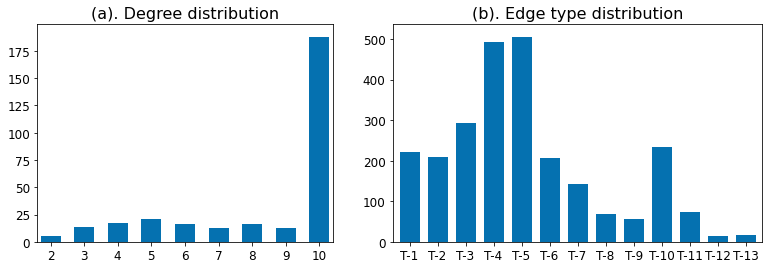

In [29]:
onepic, axes = plt.subplots(1,2,figsize=(13,4), gridspec_kw={'width_ratios': [2.4, 3]})
plt.subplots_adjust(hspace=0.25, wspace=.18)

degree_dist = degree_distribution()
values, counts = np.unique(degree_dist, return_counts=True)
axes[0].vlines(values, 0, counts, color='#0571b0', lw=20)
axes[0].set_ylim(0, max(counts) * 1.06)
axes[0].set_xticks(values)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].set_title("(a). Degree distribution", fontsize=16)

tye_vec = typed_edge_degree_distribution()
tye_vec = tye_vec.tolist()
values = ["T-1", "T-2", "T-3", "T-4", "T-5", "T-6", "T-7", "T-8", "T-9", "T-10", "T-11", "T-12", "T-13"]
axes[1].vlines(values, 0, tye_vec, color='#0571b0', lw=20)
axes[1].set_ylim(0, max(tye_vec) * 1.06)
axes[1].set_xticks(values)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].set_title("(b). Edge type distribution", fontsize=16)

plt.savefig("data_char.pdf")

In [135]:
counts

array([  5,  14,  17,  21,  16,  13,  16,  13, 188])

In [143]:
tye_vec

[222.0,
 209.0,
 293.0,
 493.0,
 506.0,
 207.0,
 142.0,
 69.0,
 57.0,
 233.0,
 74.0,
 15.0,
 17.0]